<a href="https://colab.research.google.com/github/CodeCrafter-T/Taxi-Fare-Prediction/blob/main/nyc_taxi_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***New York City Taxi Fare Prediction***
 We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers.

**Install Required Libraries**

In [1]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.0 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

**Download Data from Kaggle**

In [6]:
import opendatasets as od

In [7]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [8]:
%%time
od.download(dataset_url)

Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction
CPU times: user 45.9 s, sys: 16.7 s, total: 1min 2s
Wall time: 1min 30s


In [9]:
data_dir = './new-york-city-taxi-fare-prediction'

**View Dataset Files**

In [10]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Apr  3 14:15 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Apr  3 14:15 sample_submission.csv
-rw-r--r-- 1 root root 960K Apr  3 14:15 test.csv
-rw-r--r-- 1 root root 5.4G Apr  3 14:16 train.csv


In [11]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [12]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [13]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [14]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [15]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


**Observations:**

*   This is a supervised learning regression problem
*   Training data is 5.5 GB in size
*   Training data has 5.5 million rows
*   Test set is much smaller (< 10,000 rows)
*   The training set has 8 columns: key (a unique identifier),fare_amount(target column),
pickup_datetime,
pickup_longitude,
pickup_latitude,
dropoff_longitude,
dropoff_latitude,
passenger_count,
*   The test set has all columns except the target column fare_amount.

# **1. Loading datasets**

## **Loading Training Set**
Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

Ignore the key column
Parse pickup datetime while loading data
Specify data types for other columns
float32 for geo coordinates
float32 for fare amount
uint8 for passenger count
Work with a 1% sample of the data (~500k rows)

In [16]:
import pandas as pd
import random
sample_frac = 0.01

* Loading Only 1% Of The Training Set, To Speed Up Experimentation

In [17]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv",
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)

CPU times: user 1min 6s, sys: 1.78 s, total: 1min 8s
Wall time: 1min 9s


In [18]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


# **Load Test Set**
For the test set, we'll simply provide the data types.

In [19]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [20]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


# **2. Explore the Dataset**



*   Basic info about training set and test set
*   Exploratory data analysis & visualization


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [22]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934257,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.255058,1.341986
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [23]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [25]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042799,0.033542,0.039093,0.035435,1.278756
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [26]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

**OBSERVATIONS:**

In Train set,
* 550k+ rows, as expected
* No missing data (in the sample)
*Dates range from 1st Jan 2009 to 30th June 2015
* passenger_count ranges from 0 to 208
*  Dates range from 1st Jan 2009 to 30th June 2015
* There seem to be some errors in the latitude & longitude values
* fare_amount ranges from -52.0 to 499.0

In Test Set,
*   9914 rows of data
* No missing data (in the sample)
*1 to 6 passengers (we can limit training data to this range)
*Latitudes lie between 40 and 42
* Longitudes lie between -75 and -72
* Pickup dates range from Jan 1st 2009 to Jun 30th 2015 (same as training set)

# **Exploratory Data Analysis and Visualization**

In [29]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


## **Remove Outliers and Invalid Data**

In [30]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]
df1 = remove_outliers(df)

## **Visualising The Data**

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

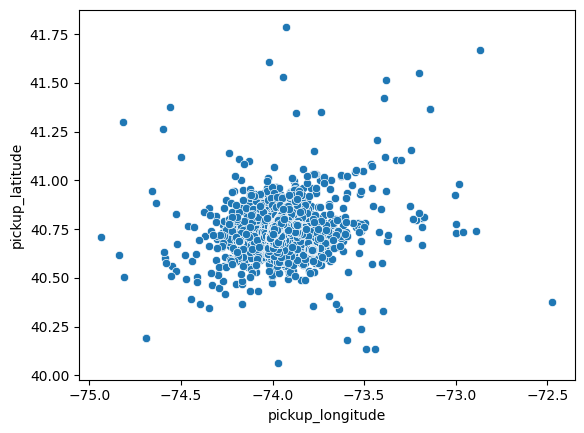

In [31]:
sns.scatterplot(data=df1, x='pickup_longitude', y='pickup_latitude')

<Axes: xlabel='fare_amount', ylabel='passenger_count'>

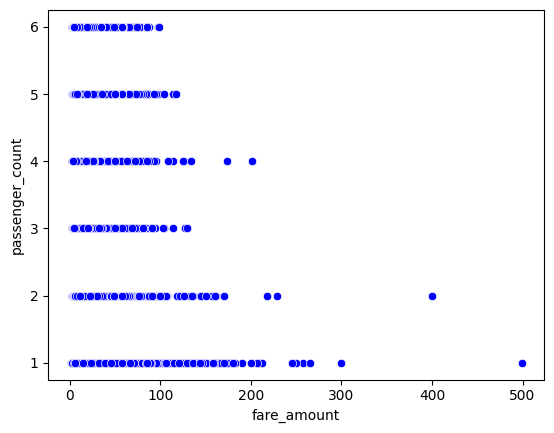

In [32]:
sns.scatterplot(data=df1, x='fare_amount', y='passenger_count',color='blue')

<Axes: xlabel='dropoff_longitude', ylabel='fare_amount'>

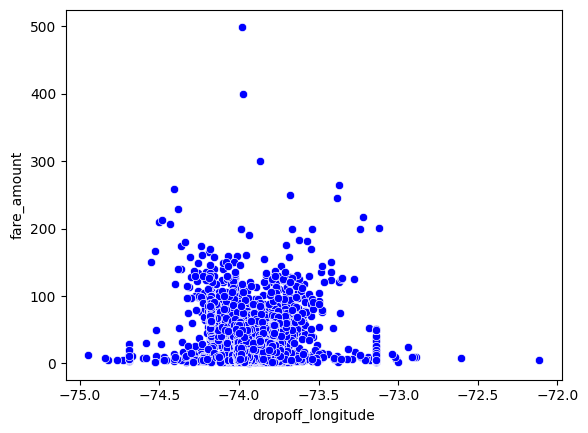

In [33]:
sns.scatterplot(data=df1, y='fare_amount', x='dropoff_longitude',color='blue')

<Axes: xlabel='pickup_longitude', ylabel='fare_amount'>

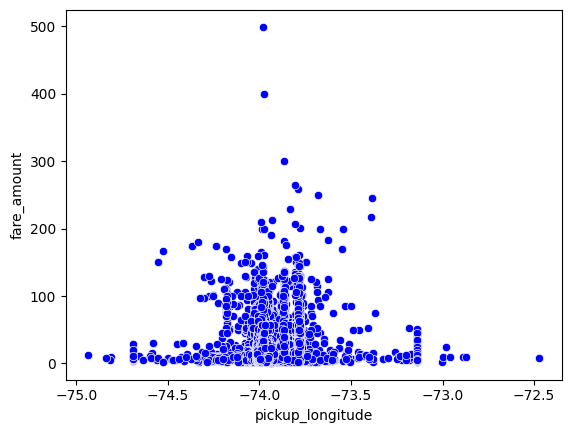

In [34]:
sns.scatterplot(data=df1, y='fare_amount', x='pickup_longitude',color='blue')

<Axes: xlabel='fare_amount', ylabel='passenger_count'>

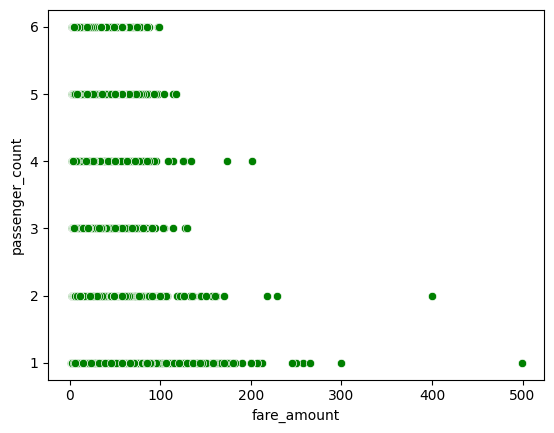

In [35]:
sns.scatterplot(data=df1,x='fare_amount',y='passenger_count',color='green')

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

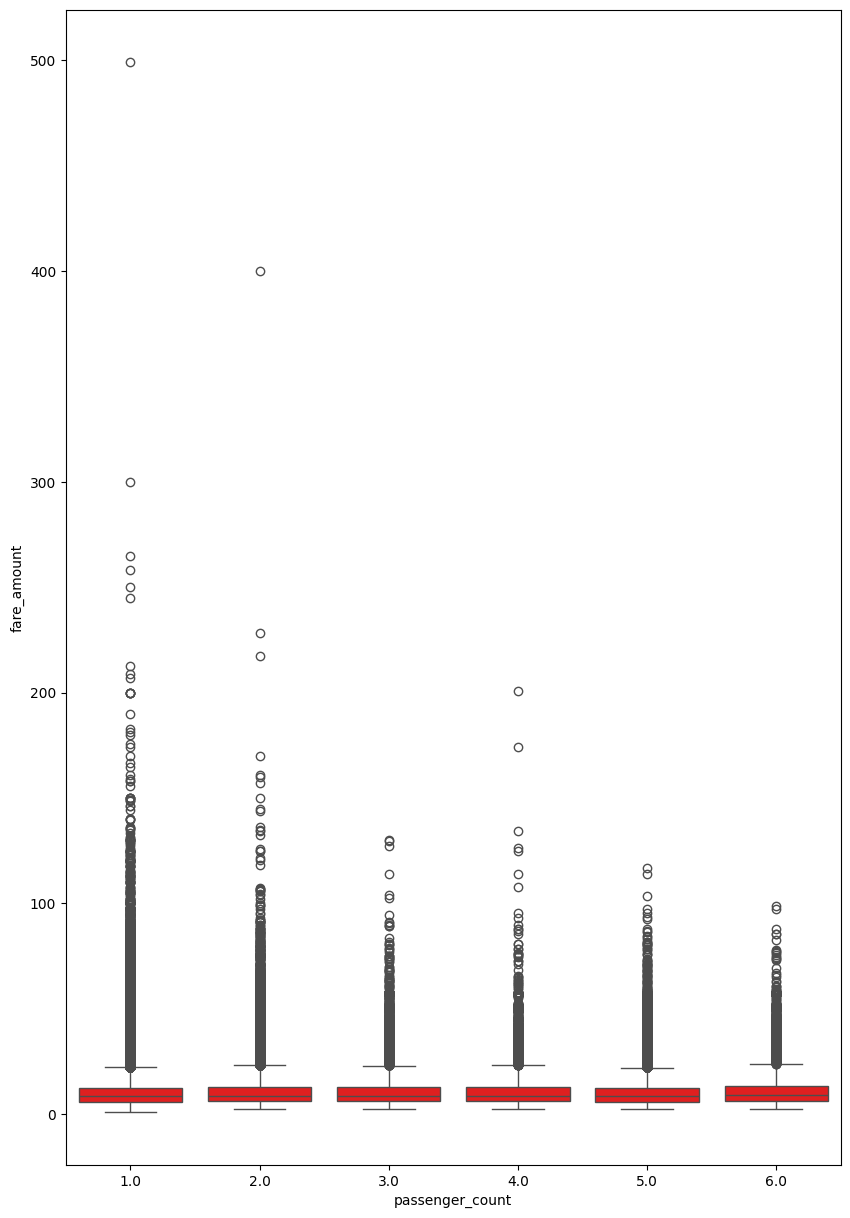

In [72]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df1,x='passenger_count',y='fare_amount',color='red')

<Axes: xlabel='pickup_datetime', ylabel='fare_amount'>

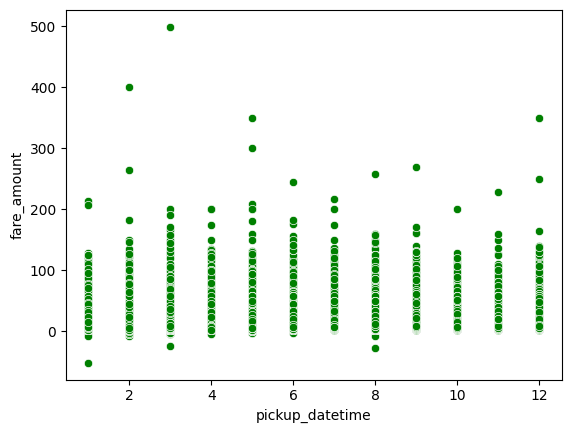

In [74]:
sns.scatterplot(data=df1,y=df['fare_amount'],x=df['pickup_datetime'].dt.month,color='green')

<Axes: xlabel='pickup_datetime', ylabel='fare_amount'>

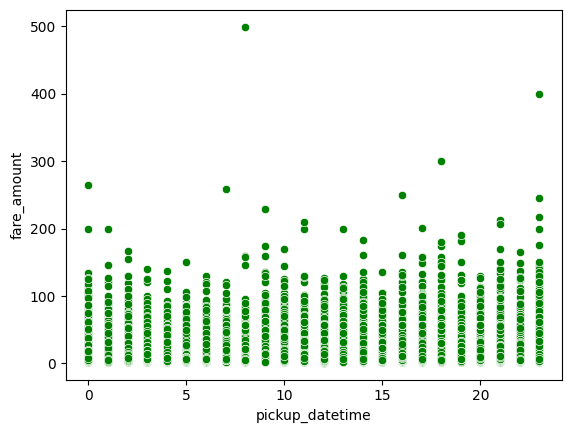

In [38]:
sns.scatterplot(data=df1,y='fare_amount',x=df['pickup_datetime'].dt.hour,color='green')

<Axes: xlabel='pickup_datetime', ylabel='fare_amount'>

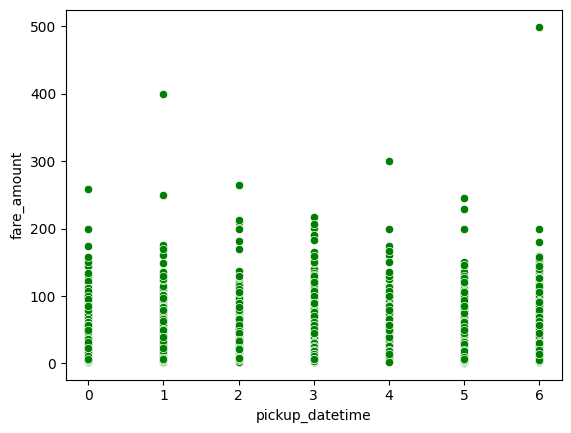

In [39]:
sns.scatterplot(data=df1,y='fare_amount',x=df['pickup_datetime'].dt.weekday,color='green')

**Observations:**

# **3.Split Training & Validation Set**
We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [40]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(val_df)

(441960, 110490)

# **Fill/Remove Missing Values**
There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [41]:
train_df = train_df.dropna()
val_df = val_df.dropna()

# **WORKING ON THE DATA**

# Extract Parts of Date

In [42]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [43]:
add_dateparts(train_df, 'pickup_datetime')
add_dateparts(val_df, 'pickup_datetime')
add_dateparts(test_df, 'pickup_datetime')
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18


# Add Distance Between Pickup and Drop

In [44]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [45]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [46]:
%%time
add_trip_distance(train_df)

CPU times: user 32 ms, sys: 4 ms, total: 36 ms
Wall time: 35.7 ms


In [47]:
add_trip_distance(val_df)
add_trip_distance(test_df)

In [48]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
308766,6.500000,2011-09-27 10:16:05+00:00,-73.992393,40.759178,-73.982582,40.766564,2.0,2011,9,27,1,10,1.164543
346971,52.540001,2015-06-26 17:18:40+00:00,-73.862923,40.769028,-73.986580,40.750423,3.0,2015,6,26,4,17,10.611527
262110,5.700000,2009-06-26 04:22:00+00:00,-73.992058,40.740261,-73.994865,40.745137,5.0,2009,6,26,4,4,0.591322
267887,27.299999,2010-09-19 17:04:00+00:00,-73.995537,40.733482,-73.955803,40.768302,2.0,2010,9,19,6,17,5.114926
176668,4.100000,2009-01-25 16:20:00+00:00,-73.966148,40.767437,-73.962761,40.775152,2.0,2009,1,25,6,16,0.903654


# Add Distance From Popular Landmarks
JFK Airport
LGA Airport
EWR Airport
Times Square
Met Meuseum
World Trade Center
We'll add the distance from drop location

In [49]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [50]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [51]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 235 ms, sys: 9.72 ms, total: 245 ms
Wall time: 254 ms


In [52]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
239259,15.7,2010-09-11 12:29:00+00:00,-74.001534,40.730984,-73.989578,40.721088,1.0,2010,9,11,5,12,1.491119,19.905205,11.538301,15.969050,6.849678,1.954678
201668,6.5,2014-07-15 10:49:37+00:00,-73.985138,40.763664,-73.972984,40.764172,1.0,2014,7,15,1,10,1.024253,21.353854,8.449490,18.890644,1.881786,6.519651
269443,10.5,2011-08-02 23:43:42+00:00,-73.996201,40.742592,-73.976692,40.782448,1.0,2011,8,2,1,23,4.723679,22.931484,8.663171,19.598633,1.184547,8.250013
130184,10.5,2011-07-02 06:03:39+00:00,-73.925499,40.772999,-73.962502,40.767100,1.0,2011,7,2,5,6,3.182060,20.898460,7.526957,19.826629,1.368120,7.253118
163888,6.1,2010-07-29 20:04:00+00:00,-73.973251,40.785122,-73.982285,40.771325,3.0,2010,7,29,3,20,1.711423,22.464230,9.133715,18.565436,1.839622,6.927621


Remove Outliers and Invalid Data
invalid data in each of the following columns:
* Fare amount
* Passenger count
* Pickup latitude & longitude
* Drop latitude & longitude

# Remove Outliers and Invalid Data

In [53]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [54]:
train_df = remove_outliers(train_df)


In [55]:
val_df = remove_outliers(val_df)

# **Save Intermediate DataFrames**

In [56]:
train_df.to_parquet('train.parquet')
val_df.to_parquet('val.parquet')
test_df.to_parquet('test.parquet')

# **Tune Hyperparmeters For XGBoost Model**

In [57]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

# **FINAL MODEL**

In [58]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [59]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [60]:
target_col = 'fare_amount'

In [61]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [62]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [63]:
test_inputs = test_df[input_cols]

In [64]:
from sklearn.metrics import mean_squared_error
'''def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds'''
from sklearn.metrics import mean_squared_error

def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds) ** 0.5  # Manually taking the square root
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds) ** 0.5  # Manually taking the square root
    return train_rmse, val_rmse, train_preds, val_preds
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [65]:
from xgboost import XGBRegressor
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [66]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: user 14 s, sys: 222 ms, total: 14.2 s
Wall time: 11.6 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [67]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1,
                               subsample=0.8, colsample_bytree=0.8)

In [68]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 36.3 s, sys: 78.8 ms, total: 36.3 s
Wall time: 23.8 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [69]:
evaluate(xgb_model_final)

(3.177574561660146,
 3.9743583881134787,
 array([ 6.40014 ,  7.826713, 10.090213, ..., 11.700136,  9.153927,
        10.020915], dtype=float32),
 array([14.793883 ,  6.1466355, 48.299778 , ...,  7.6731853, 30.364616 ,
         8.587902 ], dtype=float32))

# **Now...To Make The .pkl File**

In [70]:
import pickle
import os

# Ensure the 'models' directory exists
os.makedirs("models", exist_ok=True)

# Save the trained model inside the models folder
with open("models/xgb_model.pkl", "wb") as file:
    pickle.dump(xgb_model_final, file)

print("Model saved as models/xgb_model.pkl")


Model saved as models/xgb_model.pkl


In [71]:
import os
import pickle
import numpy as np
import pandas as pd

# Ensure "models" directory exists
os.makedirs("models", exist_ok=True)

# Function to preprocess input data
def preprocess_input(df):
    df = df.copy()  # Prevent modifying original DataFrame
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

    # Extract date parts
    df['pickup_datetime_year'] = df['pickup_datetime'].dt.year
    df['pickup_datetime_month'] = df['pickup_datetime'].dt.month
    df['pickup_datetime_day'] = df['pickup_datetime'].dt.day
    df['pickup_datetime_weekday'] = df['pickup_datetime'].dt.weekday
    df['pickup_datetime_hour'] = df['pickup_datetime'].dt.hour

    # Haversine formula to calculate distance
    def haversine_np(lon1, lat1, lon2, lat2):
      lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
      dlon = lon2 - lon1
      dlat = lat2 - lat1
      a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
      c = 2 * np.arcsin(np.sqrt(a))
      km = 6367 * c
      return km

    # Define landmark locations
    jfk_lonlat = (-73.7781, 40.6413)
    lga_lonlat = (-73.8740, 40.7769)
    ewr_lonlat = (-74.1745, 40.6895)
    met_lonlat = (-73.9632, 40.7794)
    wtc_lonlat = (-74.0099, 40.7126)

    # Compute trip distance
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'],
                                       df['dropoff_longitude'], df['dropoff_latitude'])

    # Compute distance from landmarks
    for name, (lon, lat) in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat),
                              ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        df[name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

    # Select relevant input columns
    input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                  'passenger_count', 'pickup_datetime_year', 'pickup_datetime_month',
                  'pickup_datetime_day', 'pickup_datetime_weekday', 'pickup_datetime_hour',
                  'trip_distance', 'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
                  'met_drop_distance', 'wtc_drop_distance']

    return df[input_cols]

# Save the function using pickle
with open("models/preprocessor2.pkl", "wb") as f:
    pickle.dump(preprocess_input, f)

print("Preprocessor saved as preprocessor2.pkl")


Preprocessor saved as preprocessor2.pkl
